## Importing Necessary Libraries

In [2]:
# importing standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# libraries for linear modelling

import statsmodels.api as sm
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

## Importing Data

In [7]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Exploratory Data Analysis

The variable present in this dataset can be divided into following two categories: (a) Numerical, (b) Categorical
- Numerical: temp, atemp, hum, windspeed,
- Categorical: season, yr, month, weekday, holiday, workingday, weathersit,

The relationship between remaining three columns is
cnt = casual + registered
### _Hence, two approaches will be encoded here and better one will be selected_
#### <font color = 'red'> Approach 1: cnt = cnt(numeric and categorical variables) </font>
#### <font color = 'red'> Approach 2: cnt = casual(numeric and categorical variables) + registered(numeric and categorical variables) </font>

### All three variables 'cnt', 'registered', and 'categorical' are showing number of rides. Therefore, using all three of them will be inaccurate and redundant. Therefore, the above two approaches are considered.

## Preparing data for exploratory data analysis

- The instant columns is not required for the analysis
- year and month are already present as separate column, hence column 'dteday' can be ignored

In [13]:
# deleting un-necessary variables
df = df.drop(['instant', 'dteday'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Impact of categorical variables

#### <font color='blue'>_Impact on 'cnt'_</font>

In [17]:
# grouping the coordinates
grpCnt_season = df[['season','cnt']].groupby(by='season').mean()
grpCnt_yr = df[['yr','cnt']].groupby(by='yr').mean()
grpCnt_mnth = df[['mnth','cnt']].groupby(by='mnth').mean()
grpCnt_holiday = df[['holiday','cnt']].groupby(by='holiday').mean()
grpCnt_weekday = df[['weekday','cnt']].groupby(by='weekday').mean()
grpCnt_weathersit = df[['weathersit','cnt']].groupby(by='weathersit').mean()

[Text(1, 0, 'clear'), Text(2, 0, 'misty'), Text(3, 0, 'light-rain')]

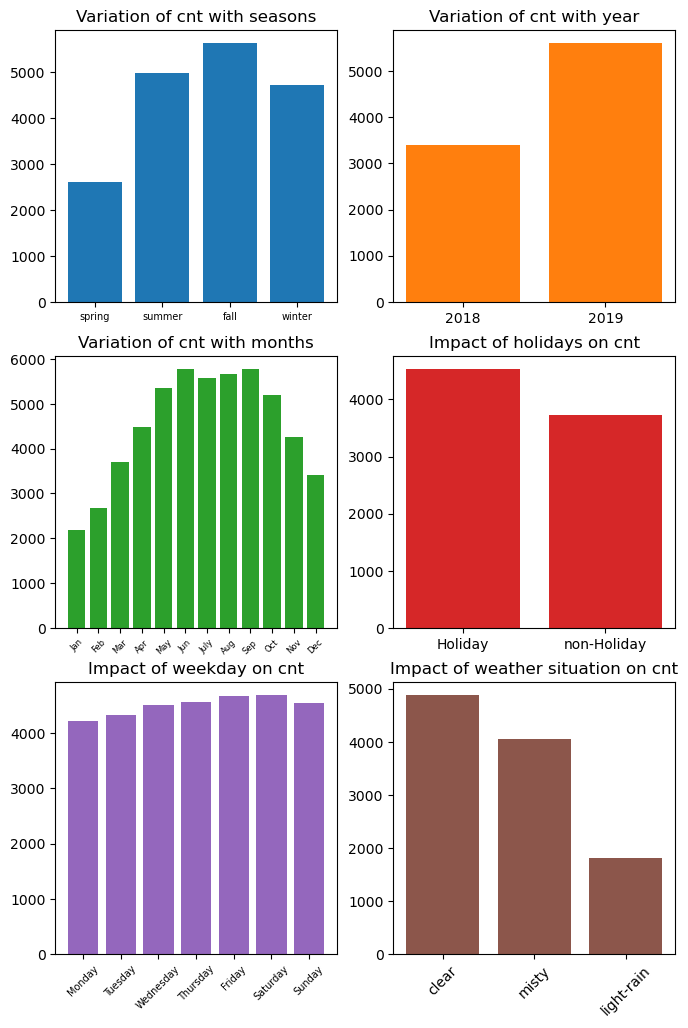

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8,12))

# seasons
ax[0,0].bar(grpCnt_season.index, grpCnt_season[grpCnt_season.columns[0]], color='tab:blue')
ax[0,0].set_title('Variation of cnt with seasons')
ax[0,0].set_xticks([1,2,3,4])
ax[0,0].set_xticklabels(['spring', 'summer', 'fall', 'winter'], fontsize=7)

# year
ax[0,1].bar(grpCnt_yr.index, grpCnt_yr[grpCnt_yr.columns[0]], color='tab:orange')
ax[0,1].set_title('Variation of cnt with year')
ax[0,1].set_xticks([0,1])
ax[0,1].set_xticklabels(['2018', '2019'])

# month
ax[1,0].bar(grpCnt_mnth.index, grpCnt_mnth[grpCnt_mnth.columns[0]], color='tab:green')
ax[1,0].set_title('Variation of cnt with months')
ax[1,0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax[1,0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45, fontsize=6)

# holiday
ax[1,1].bar(grpCnt_holiday.index, grpCnt_holiday[grpCnt_holiday.columns[0]], color='tab:red')
ax[1,1].set_title('Impact of holidays on cnt')
ax[1,1].set_xticks([0,1])
ax[1,1].set_xticklabels(['Holiday', 'non-Holiday'])

# weekday
ax[2,0].bar(grpCnt_weekday.index, grpCnt_weekday[grpCnt_weekday.columns[0]], color='tab:purple')
ax[2,0].set_title('Impact of weekday on cnt')
ax[2,0].set_xticks([0,1,2,3,4,5,6])
ax[2,0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45, fontsize=7)

# weather situation
ax[2,1].bar(grpCnt_weathersit.index, grpCnt_weathersit[grpCnt_weathersit.columns[0]], color='tab:brown')
ax[2,1].set_title('Impact of weather situation on cnt')
ax[2,1].set_xticks([1,2,3])
ax[2,1].set_xticklabels(['clear', 'misty', 'light-rain'], rotation=45)

#### <font color='blue'>_Impact on 'registered'_</font>

In [20]:
# grouping the coordinates
grpReg_season = df[['season','registered']].groupby(by='season').mean()
grpReg_yr = df[['yr','registered']].groupby(by='yr').mean()
grpReg_mnth = df[['mnth','registered']].groupby(by='mnth').mean()
grpReg_holiday = df[['holiday','registered']].groupby(by='holiday').mean()
grpReg_weekday = df[['weekday','registered']].groupby(by='weekday').mean()
grpReg_weathersit = df[['weathersit','registered']].groupby(by='weathersit').mean()

[Text(1, 0, 'clear'), Text(2, 0, 'misty'), Text(3, 0, 'light-rain')]

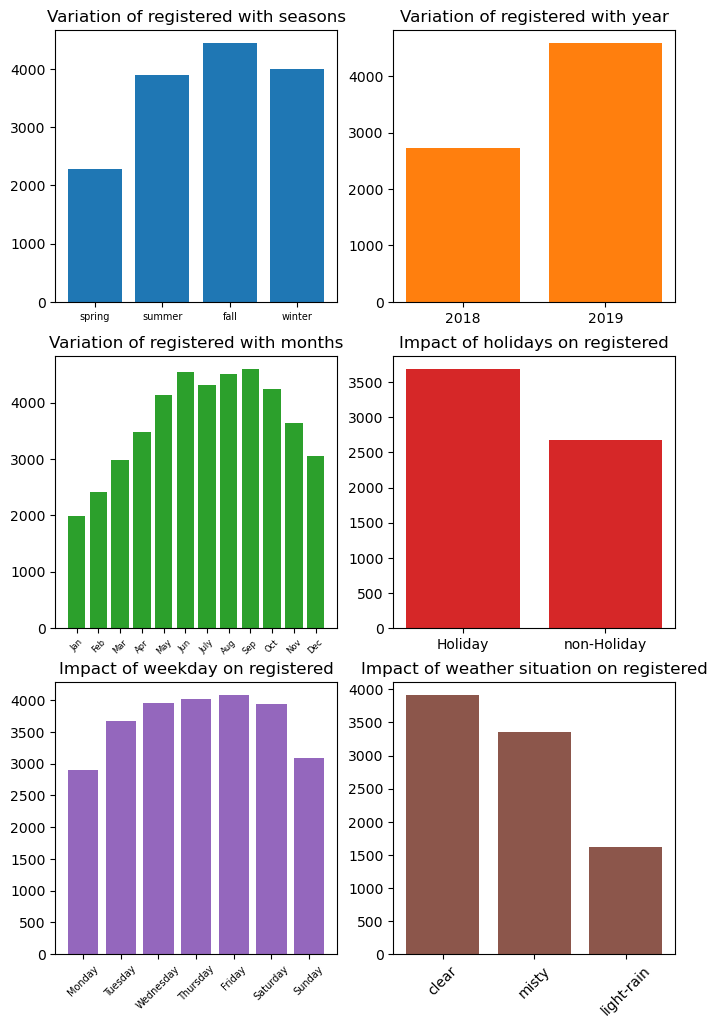

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8,12))

# seasons
ax[0,0].bar(grpReg_season.index, grpReg_season[grpReg_season.columns[0]], color='tab:blue')
ax[0,0].set_title('Variation of registered with seasons')
ax[0,0].set_xticks([1,2,3,4])
ax[0,0].set_xticklabels(['spring', 'summer', 'fall', 'winter'], fontsize=7)

# year
ax[0,1].bar(grpReg_yr.index, grpReg_yr[grpReg_yr.columns[0]], color='tab:orange')
ax[0,1].set_title('Variation of registered with year')
ax[0,1].set_xticks([0,1])
ax[0,1].set_xticklabels(['2018', '2019'])

# month
ax[1,0].bar(grpReg_mnth.index, grpReg_mnth[grpReg_mnth.columns[0]], color='tab:green')
ax[1,0].set_title('Variation of registered with months')
ax[1,0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax[1,0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45, fontsize=6)

# holiday
ax[1,1].bar(grpReg_holiday.index, grpReg_holiday[grpReg_holiday.columns[0]], color='tab:red')
ax[1,1].set_title('Impact of holidays on registered')
ax[1,1].set_xticks([0,1])
ax[1,1].set_xticklabels(['Holiday', 'non-Holiday'])

# weekday
ax[2,0].bar(grpReg_weekday.index, grpReg_weekday[grpReg_weekday.columns[0]], color='tab:purple')
ax[2,0].set_title('Impact of weekday on registered')
ax[2,0].set_xticks([0,1,2,3,4,5,6])
ax[2,0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45, fontsize=7)

# weather situation
ax[2,1].bar(grpReg_weathersit.index, grpReg_weathersit[grpReg_weathersit.columns[0]], color='tab:brown')
ax[2,1].set_title('Impact of weather situation on registered')
ax[2,1].set_xticks([1,2,3])
ax[2,1].set_xticklabels(['clear', 'misty', 'light-rain'], rotation=45)

#### <font color='blue'>_Impact on 'casual'_</font>

In [23]:
# grouping the coordinates
grpCas_season = df[['season','casual']].groupby(by='season').mean()
grpCas_yr = df[['yr','casual']].groupby(by='yr').mean()
grpCas_mnth = df[['mnth','casual']].groupby(by='mnth').mean()
grpCas_holiday = df[['holiday','casual']].groupby(by='holiday').mean()
grpCas_weekday = df[['weekday','casual']].groupby(by='weekday').mean()
grpCas_weathersit = df[['weathersit','casual']].groupby(by='weathersit').mean()

[Text(1, 0, 'clear'), Text(2, 0, 'misty'), Text(3, 0, 'light-rain')]

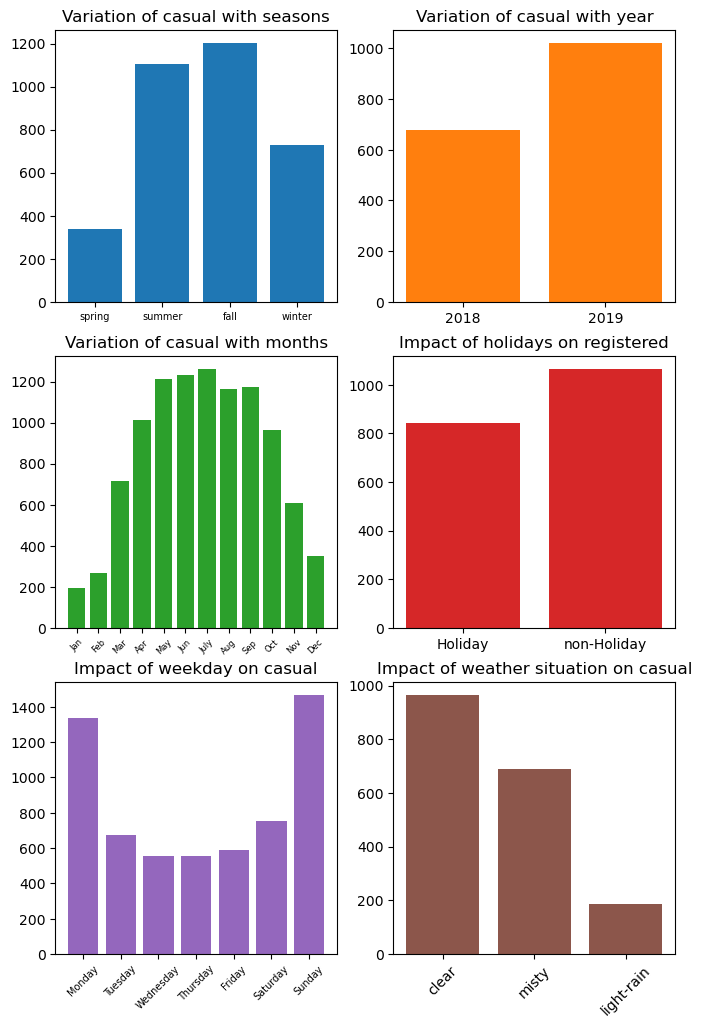

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8,12))

# seasons
ax[0,0].bar(grpCas_season.index, grpCas_season[grpCas_season.columns[0]], color='tab:blue')
ax[0,0].set_title('Variation of casual with seasons')
ax[0,0].set_xticks([1,2,3,4])
ax[0,0].set_xticklabels(['spring', 'summer', 'fall', 'winter'], fontsize=7)

# year
ax[0,1].bar(grpCas_yr.index, grpCas_yr[grpCas_yr.columns[0]], color='tab:orange')
ax[0,1].set_title('Variation of casual with year')
ax[0,1].set_xticks([0,1])
ax[0,1].set_xticklabels(['2018', '2019'])

# month
ax[1,0].bar(grpCas_mnth.index, grpCas_mnth[grpCas_mnth.columns[0]], color='tab:green')
ax[1,0].set_title('Variation of casual with months')
ax[1,0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax[1,0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45, fontsize=6)

# holiday
ax[1,1].bar(grpCas_holiday.index, grpCas_holiday[grpCas_holiday.columns[0]], color='tab:red')
ax[1,1].set_title('Impact of holidays on registered')
ax[1,1].set_xticks([0,1])
ax[1,1].set_xticklabels(['Holiday', 'non-Holiday'])

# weekday
ax[2,0].bar(grpCas_weekday.index, grpCas_weekday[grpCas_weekday.columns[0]], color='tab:purple')
ax[2,0].set_title('Impact of weekday on casual')
ax[2,0].set_xticks([0,1,2,3,4,5,6])
ax[2,0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45, fontsize=7)

# weather situation
ax[2,1].bar(grpCas_weathersit.index, grpCas_weathersit[grpCas_weathersit.columns[0]], color='tab:brown')
ax[2,1].set_title('Impact of weather situation on casual')
ax[2,1].set_xticks([1,2,3])
ax[2,1].set_xticklabels(['clear', 'misty', 'light-rain'], rotation=45)

### <font color='blue'>Impact of numerical variables</font>

#### _Finding the correlation between numeric variables and target variables_

Text(0.5, 1.0, 'Correlation with casual')

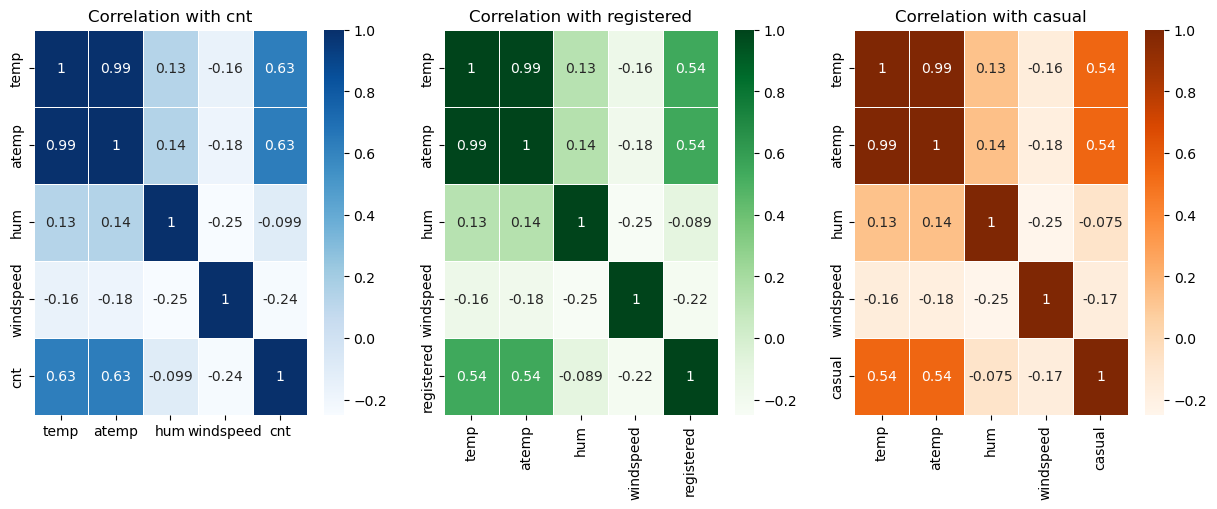

In [28]:
plt.figure(figsize=(15,5))

ax1 = plt.subplot(1,3,1)
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, linewidth=0.5, cmap='Blues')
ax1.set_title('Correlation with cnt')

ax2 = plt.subplot(1,3,2)
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'registered']].corr(), annot=True, linewidth=0.5, cmap='Greens')
ax2.set_title('Correlation with registered')

ax3 = plt.subplot(1,3,3)
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'casual']].corr(), annot=True, linewidth=0.5, cmap='Oranges')
ax3.set_title('Correlation with casual')

Text(0.5, 1.05, 'Relation Between Target and Numerical Variables')

<Figure size 640x480 with 0 Axes>

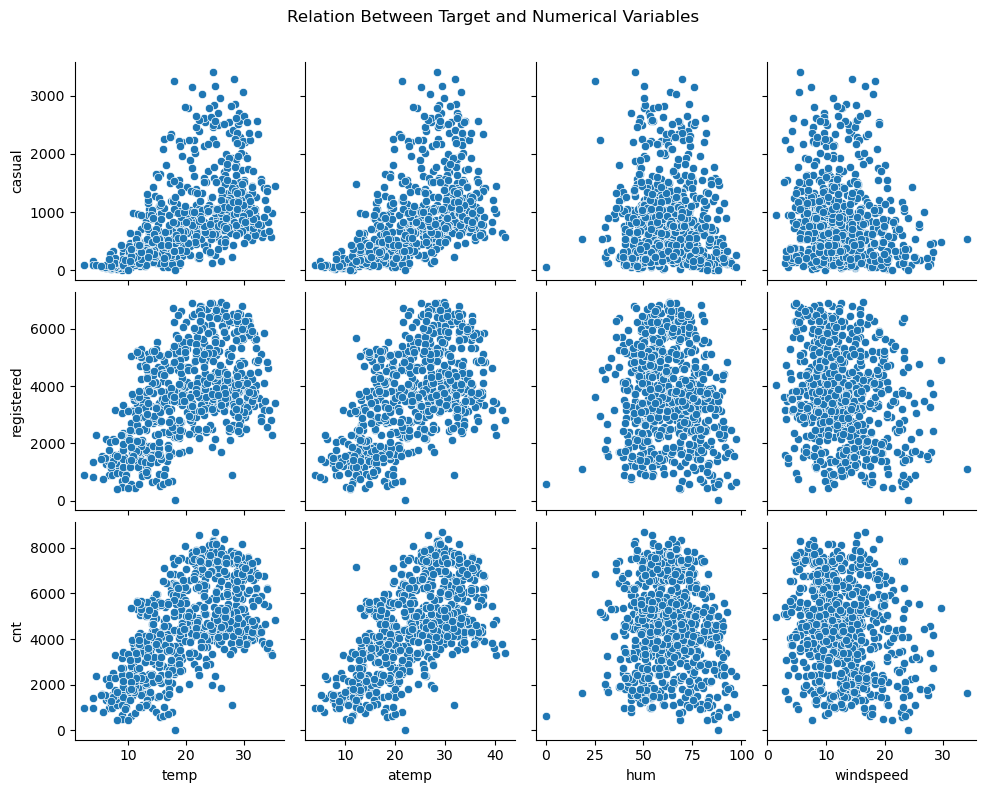

In [29]:
plt.figure()
pplot1 = sns.pairplot(data=df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']], x_vars=['temp', 'atemp', 'hum', 'windspeed',], y_vars=['casual', 'registered', 'cnt'])
pplot1.fig.suptitle('Relation Between Target and Numerical Variables', y=1.05)

Text(0.5, 1.05, 'Relation Among Numerical Variables')

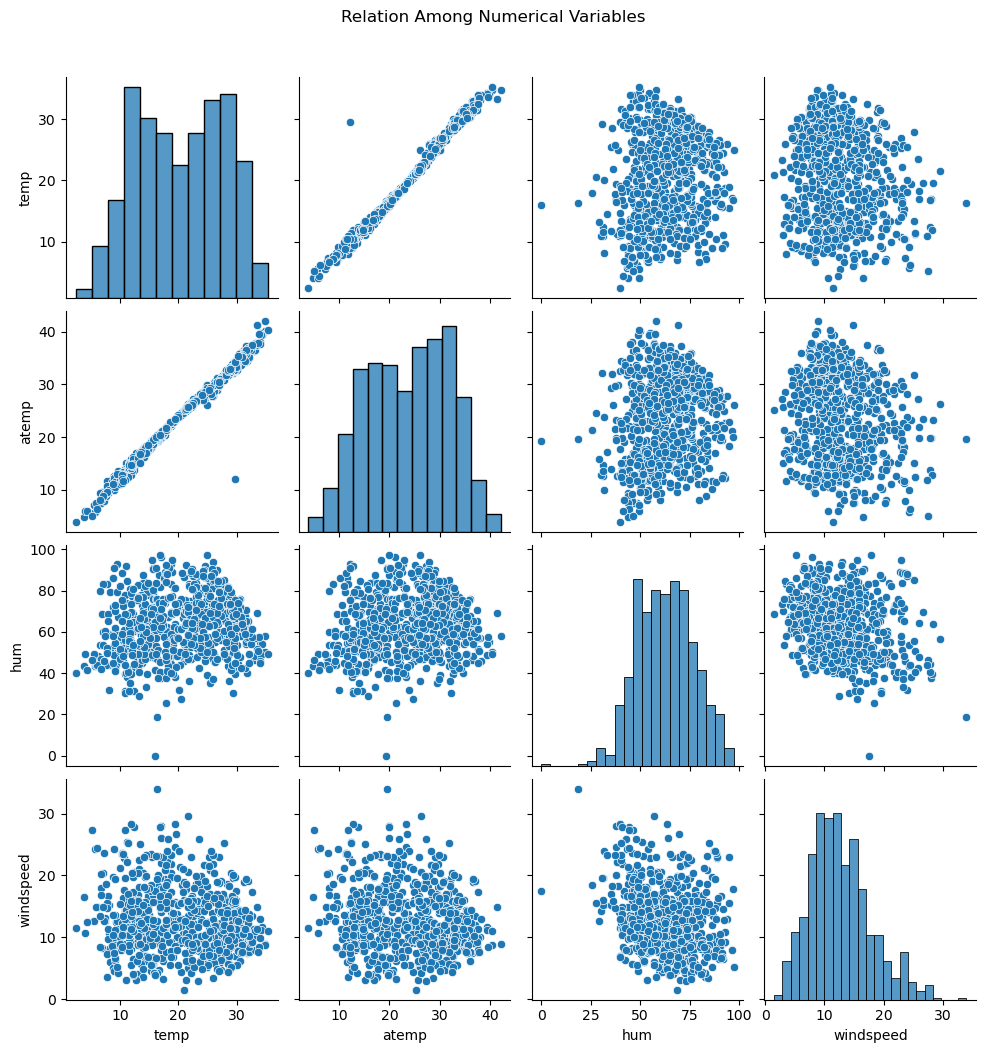

In [30]:
pplot2 = sns.pairplot(data=df[['temp', 'atemp', 'hum', 'windspeed']] )
pplot2.fig.suptitle('Relation Among Numerical Variables', y=1.05)

### Observations from exploratory data analysis

- <font color='blue'> All categorical variables except 'weekday' have considerable influence on 'cnt' </font>
- <font color='blue'> All categorical variables including 'weekday' have considerable influence on 'casual' and 'registered' </font>
- <font color='blue'> Thuough, both 'casual' and 'registered' show same trend, the quantitave relationship between categorical variables and 'casual'-'registered' can be different </font>
- <font color='blue'> Except 'temp' and 'atemp', rest of the numerical variables and target variables show weak correlation. Especially, humidity has correlation values of less than 0.1 with target variables. </font>
- <font color='blue'> As expected, 'temp' and 'atemp' show very strong correlation. Their scatter plot is almost a straight line. </font>

### Conclusions from exploratory data analysis

- <font color='red'> __Because 'casual' and 'registered' show opposite trends when impact of weekday is considered, both of the variables will be modelled separately__ </font>
- <font color='red'> __It must be noted that, though we consider 'yr' as a categorical variable, the year in itself has no impact on the bike rentals. Ideally, the factors that lead to rising rentals in 2019 must be separately studied and possibly included in the model in place of 'yr'. However, because of the lack of the data, here we include the 'yr' as separate regressor__ </font>
- <font color='red'> __Only 'atemp' will be included in place of 'temp' and 'atemp' as both of them show very strong correlation__ </font>
- <font color='red'> __Variables 'hum' and 'windspeed' will not be included in the model because of their low correlation with target variabels. Windspeed might be considered later in-case we get low r-squared value__ </font>

## _Creating Dummy Variables_

In [35]:
# for weekday
weekday_dum = pd.get_dummies(df['weekday'], dtype=int, drop_first=True)
weekday_dum.rename(columns={1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}, inplace=True)

# for season
season_dum = pd.get_dummies(df['season'], dtype=int, drop_first=True)
season_dum.rename(columns={2:'summer', 3:'fall', 4:'winter'}, inplace=True)

# for holiday
holiday_dum = pd.get_dummies(df['holiday'], dtype=int, drop_first=True)
holiday_dum.rename(columns={1:'holiday_yes'}, inplace=True)

# for weathersit
weathersit_dum = pd.get_dummies(df['weathersit'], dtype=int, drop_first=True)
weathersit_dum.rename(columns={2:'misty', 3:'light-rain'}, inplace=True)

# for yr
yr_dum = pd.get_dummies(df['yr'], dtype=int, drop_first=True)
yr_dum.rename(columns={1:2019}, inplace=True)

# for mnth
mnth_dum = pd.get_dummies(df['mnth'], dtype=int, drop_first=True)
mnth_dum.rename(columns={2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec', }, inplace=True)

In [36]:
# dropping the categorical variables
df_final = df.drop(['weekday', 'season', 'yr', 'mnth', 'weathersit', 'holiday', 'workingday'], axis=1)

In [37]:
# dropping 'hum', 'windspeed', and 'atemp'
df_final = df_final.drop(['hum', 'windspeed', 'temp'], axis=1)
df_final

,atemp,casual,registered,cnt
0,18.18125,331,654,985
1,17.68695,131,670,801
2,9.47025,120,1229,1349
3,10.60610,108,1454,1562
4,11.46350,82,1518,1600
...,...,...,...,...
725,11.33210,247,1867,2114
726,12.75230,644,2451,3095
727,12.12000,159,1182,1341
728,11.58500,364,1432,1796


## _Creating dataframes for models_

In [39]:
# dataframe to develop model for 'casual'
df_casual = pd.concat([df_final[['atemp','casual']],weekday_dum, season_dum, holiday_dum, weathersit_dum, yr_dum, mnth_dum], axis=1)

# dataframe to develop model for 'registered'
df_registered = pd.concat([df_final[['atemp','registered']],weekday_dum, season_dum, holiday_dum, weathersit_dum, yr_dum, mnth_dum], axis=1)

# dataframe to develop model for 'cnt'
df_cnt = pd.concat([df_final[['atemp','cnt']],weekday_dum, season_dum, holiday_dum, weathersit_dum, yr_dum, mnth_dum], axis=1)

## _Test-Train split_

In [42]:
# test-train split for casual
cas_train, cas_test = train_test_split(df_casual, train_size=0.7, test_size=0.3, random_state=100)

In [43]:
cas_train.shape[0]/df_casual.shape[0]*100

69.86301369863014

In [44]:
# test-train split for casual
cas_train, cas_test = train_test_split(df_casual, train_size=0.7, test_size=0.3, random_state=100)

In [45]:
# test-train split for registered
reg_train, reg_test = train_test_split(df_registered, train_size=0.7, test_size=0.3, random_state=100)

In [46]:
# test-train split for cnt
cnt_train, cnt_test = train_test_split(df_cnt, train_size=0.7, test_size=0.3, random_state=100)

In [47]:
reg_train.shape[0]/df_registered.shape[0]*100

69.86301369863014

## _Scaling the variables_

In [49]:
scaler_cas = MinMaxScaler()
scaler_reg = MinMaxScaler()
scaler_cnt = MinMaxScaler()

In [50]:
# scaling the casual dataframe
cas_train[['atemp','casual']] = scaler_cas.fit_transform(cas_train[['atemp','casual']])

# scaling the casual dataframe
reg_train[['atemp','registered']] = scaler_reg.fit_transform(reg_train[['atemp','registered']])

# scaling the casual dataframe
cnt_train[['atemp','cnt']] = scaler_cnt.fit_transform(cnt_train[['atemp','cnt']])


## _Models for casual_

In [52]:
### Dividing into dataset into input and target variables

cas_y = cas_train.pop('casual')
cas_x = cas_train

In [53]:
# adding the constant to x matrix
cas_x = sm.add_constant(cas_x)


 <font color='red'> __The months and seasons are showing same data (chaging demand across the year), but with different resolution. Hence, two casual models will be developed. The first model will contain of seasons (cas_x_1 as input matrix), while second model will contain months (cas_x_2 as input matrix).__ </font>
 

In [55]:
cas_x.columns

Index([      'const',       'atemp',         'Mon',         'Tue',
               'Wed',         'Thu',         'Fri',         'Sat',
            'summer',        'fall',      'winter', 'holiday_yes',
             'misty',  'light-rain',          2019,         'Feb',
               'Mar',         'Apr',         'May',         'Jun',
               'Jul',         'Aug',         'Sep',         'Oct',
               'Nov',         'Dec'],
      dtype='object')

In [56]:
cas_x_1 = cas_x[['const', 'atemp', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'holiday_yes', 'misty', 'light-rain', 2019, 'summer', 'fall', 'winter']]

cas_x_2 = cas_x[['const', 'atemp', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'holiday_yes', 'misty', 'light-rain', 2019, 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

### <font color='blue'> First casual model </font>

In [58]:
cas_model_1 = sm.OLS(cas_y, cas_x_1).fit()

In [59]:
print(cas_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     89.05
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          2.80e-125
Time:                        17:45:31   Log-Likelihood:                 403.36
No. Observations:                 510   AIC:                            -776.7
Df Residuals:                     495   BIC:                            -713.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0972      0.020      4.802      

#### <font color='orange'>Observations from first model</font>
- All p-values are below 0.05. Hence, all the coefficients are significant
- F-stattistic value is suffficiently high to make the fitting significant
- R-squared value is also in acceptable value

#### <font color='orange'>VIF and Error analysis </font>

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_cas_mod1 = pd.DataFrame()
vif_cas_mod1['Features'] = cas_x_1.columns
vif_cas_mod1['VIF'] = [variance_inflation_factor(cas_x_1.values, i) for i in range(cas_x_1.shape[1])]
vif_cas_mod1['VIF'] = round(vif_cas_mod1['VIF'], 2)
vif_cas_mod1 = vif_cas_mod1.sort_values(by = "VIF", ascending = False)
vif_cas_mod1

,Features,VIF
0,const,16.85
13,fall,4.33
1,atemp,3.02
12,summer,2.48
2,Mon,1.85
14,winter,1.83
4,Wed,1.80
7,Sat,1.77
5,Thu,1.69
3,Tue,1.67


<Axes: ylabel='Density'>

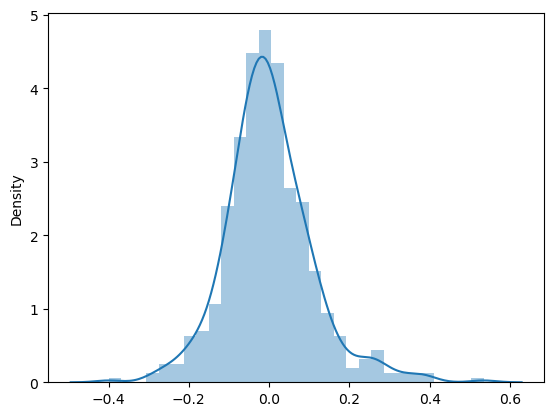

In [62]:
# residuals
cas_mod1_pred = cas_model_1.predict(cas_x_1)
sns.distplot(cas_y - cas_mod1_pred, bins = 30)

### <font color='blue'>Second casual model</font>

In [64]:
cas_model_2 = sm.OLS(cas_y, cas_x_2).fit()

In [65]:
print(cas_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     61.15
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          8.66e-125
Time:                        17:45:32   Log-Likelihood:                 420.45
No. Observations:                 510   AIC:                            -794.9
Df Residuals:                     487   BIC:                            -697.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1018      0.023      4.355      

#### <font color='orange'>Observations from second model</font>
- All p-values except that of 'Dec', 'Feb' and 'Jul' below 0.05.
- F-statistic value is suffficiently high to make the fitting significant
- R-squared value is also in acceptable range

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_cas_mod2 = pd.DataFrame()
vif_cas_mod2['Features'] = cas_x_2.columns
vif_cas_mod2['VIF'] = [variance_inflation_factor(cas_x_2.values, i) for i in range(cas_x_2.shape[1])]
vif_cas_mod2['VIF'] = round(vif_cas_mod1['VIF'], 2)
vif_cas_mod2 = vif_cas_mod2.sort_values(by = "VIF", ascending = False)
vif_cas_mod2

,Features,VIF
0,const,16.85
13,Mar,4.33
1,atemp,3.02
12,Feb,2.48
2,Mon,1.85
14,Apr,1.83
4,Wed,1.80
7,Sat,1.77
5,Thu,1.69
3,Tue,1.67


<Axes: ylabel='Density'>

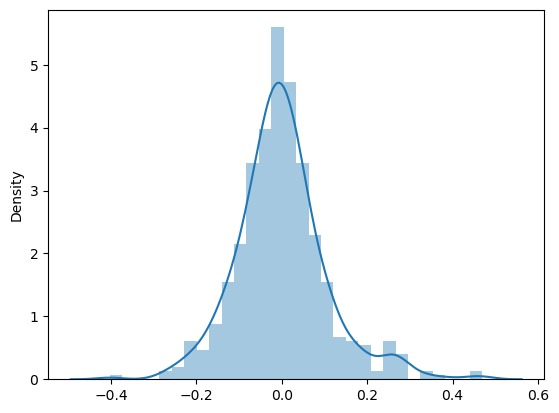

In [68]:
# residuals
cas_mod1_pred2 = cas_model_2.predict(cas_x_2)
sns.distplot(cas_y - cas_mod1_pred2, bins = 30)

#### <font color='orange'>Observations from VIF and error analysis</font>
- The VIF values for all the variables are under 5, and hence acceptable
- The errors are also normally distributed around zero

#### <font color='blue'>Comparison between casual model 1 and casual model 2</font>
- The coefficients of some of the months is not significant
- It does not make sense to drop some months, originally they are part of the single original variable 
- The second approach also has higher number of variables when compared to first approach
#### <font color='red'>_Therefore, first model with seasons is selected for casual_</font>

## _Model for Registered_

In [70]:
### Dividing into dataset into input and target variables

reg_y = reg_train.pop('registered')
reg_x = reg_train

In [71]:
# adding the constant to x matrix
reg_x = sm.add_constant(reg_x)


 <font color='red'> __The months and season are showing same data (changing demand across the year), but with different resolution. Hence, two registered models will be developed. The first model will contain of seasons (reg_x_1 as input matrix), while second model will contain months (reg_x_2 as input matrix).__ </font>
 

In [74]:
reg_x_1 = reg_x[['const', 'atemp', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'holiday_yes', 'misty', 'light-rain', 2019, 'summer', 'fall', 'winter']]

reg_x_2 = reg_x[['const', 'atemp', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'holiday_yes', 'misty', 'light-rain', 2019, 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

#### <font color='blue'>_The first model for registered users_</font>

In [75]:
reg_model_1 = sm.OLS(reg_y, reg_x_1).fit()

In [76]:
print(reg_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.9
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          7.86e-184
Time:                        17:45:34   Log-Likelihood:                 491.10
No. Observations:                 510   AIC:                            -952.2
Df Residuals:                     495   BIC:                            -888.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0017      0.017      0.097      

#### <font color='orange'> Observations from first model </font>
- All p-values are below 0.05. Hence, all the coefficients are significant
- F-stattistic value is suffficiently high to make the fitting significant
- R-squared value is also in acceptable value

#### <font color = 'orange'> VIF and Error analysis </font>

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_reg_mod1 = pd.DataFrame()
vif_reg_mod1['Features'] = reg_x_1.columns
vif_reg_mod1['VIF'] = [variance_inflation_factor(reg_x_1.values, i) for i in range(reg_x_1.shape[1])]
vif_reg_mod1['VIF'] = round(vif_reg_mod1['VIF'], 2)
vif_reg_mod1 = vif_reg_mod1.sort_values(by = "VIF", ascending = False)
vif_reg_mod1

,Features,VIF
0,const,16.85
13,fall,4.33
1,atemp,3.02
12,summer,2.48
2,Mon,1.85
14,winter,1.83
4,Wed,1.80
7,Sat,1.77
5,Thu,1.69
3,Tue,1.67


<Axes: ylabel='Density'>

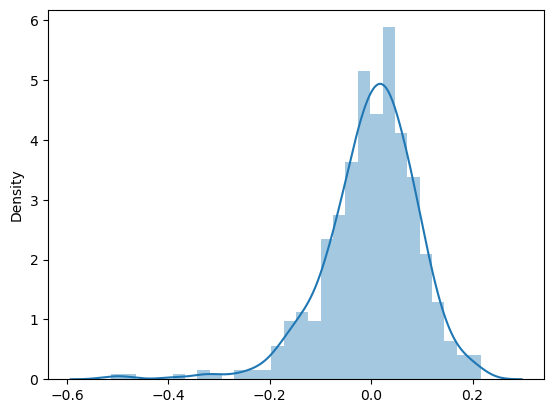

In [79]:
# residuals
reg_mod1_pred = reg_model_1.predict(reg_x_1)
sns.distplot(reg_y - reg_mod1_pred, bins = 30)

#### <font color='orange'>Observations from VIF and error analysis</font>
- The VIF values for all the variables are under 5, and hence acceptable
- The errors are also normally distributed around zero

#### <font color='blue'>_The second model for registered users_</font>

In [80]:
reg_model_2 = sm.OLS(reg_y, reg_x_2).fit()

In [81]:
print(reg_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          6.41e-172
Time:                        17:45:34   Log-Likelihood:                 483.27
No. Observations:                 510   AIC:                            -920.5
Df Residuals:                     487   BIC:                            -823.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0029      0.021     -0.138      

#### <font color='Orange'>Observations from second model</font>
- All p-values except that for 'Feb' are below 0.05. 
- F-stattistic value is suffficiently high to make the fitting significant
- R-squared value is also in acceptable value

#### <font color = 'orange'> VIF and Error analysis </font>

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_reg_mod2 = pd.DataFrame()
vif_reg_mod2['Features'] = reg_x_2.columns
vif_reg_mod2['VIF'] = [variance_inflation_factor(reg_x_2.values, i) for i in range(reg_x_2.shape[1])]
vif_reg_mod2['VIF'] = round(vif_reg_mod2['VIF'], 2)
vif_reg_mod2 = vif_reg_mod2.sort_values(by = "VIF", ascending = False)
vif_reg_mod2

,Features,VIF
0,const,23.66
1,atemp,5.36
18,Aug,4.91
17,Jul,4.86
16,Jun,4.01
19,Sep,3.59
15,May,3.43
20,Oct,2.75
14,Apr,2.41
13,Mar,2.31


<Axes: ylabel='Density'>

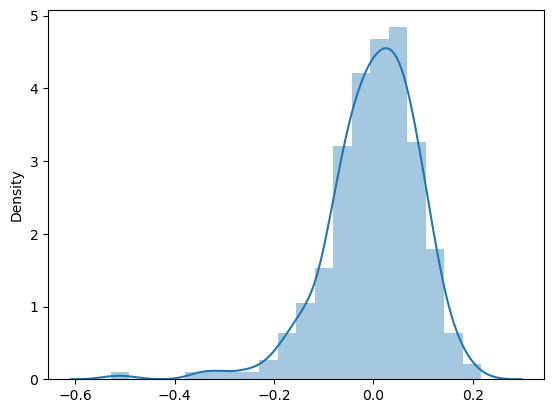

In [84]:
# residuals
reg_mod2_pred = reg_model_2.predict(reg_x_2)
sns.distplot(reg_y - reg_mod2_pred, bins = 20)

#### <font color='orange'>Observations from VIF and error analysis</font>
- The VIF values for all the variables are under 5, and hence acceptable
- The errors are also normally distributed around zero

#### <font color='blue'>Comparison between registered model 1 and registered model 2</font>
- The coefficients of some of the months in registered model 2 is not significant
- It does not make sense to drop some months, originally they are part of the single original variable 
- The second approach also has higher number of variables when compared to first approach
#### <font color='red'>_Therefore, first model with seasons is selected for registered_</font>

## _Model for Cnt_

In [86]:
### Dividing into dataset into input and target variables

cnt_y = cnt_train.pop('cnt')
cnt_x = reg_train

In [87]:
# adding the constant to x matrix
cnt_x = sm.add_constant(cnt_x)


 <font color='red'> __The months and season are showing same data, but with different resolution. Hence, two registered models will be developed. The first model will contain of seasons (cnt_x_1 as input matrix), while second model will contain months (cnt_x_2 as input matrix).__ </font>
 

In [90]:
cnt_x_1 = cnt_x[['const', 'atemp', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'holiday_yes', 'misty', 'light-rain', 2019, 'summer', 'fall', 'winter']]

cnt_x_2 = cnt_x[['const', 'atemp', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'holiday_yes', 'misty', 'light-rain', 2019, 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

#### <font color='blue'>_The first model for cnt_</font>

In [91]:
cnt_model_1 = sm.OLS(cnt_y, cnt_x_1).fit()

In [92]:
print(cnt_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     158.4
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.41e-172
Time:                        17:45:36   Log-Likelihood:                 472.34
No. Observations:                 510   AIC:                            -914.7
Df Residuals:                     495   BIC:                            -851.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0380      0.018      2.150      

#### <font color='orange'>Observations from the first model</font>
- All p-values are below 0.05. Hence, all the coefficients are significant
- F-statistic value is suffficiently high to make the fitting significant
- R-squared value is also in acceptable range

#### <font color = 'orange'> VIF and Error analysis </font>

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_cnt_mod1 = pd.DataFrame()
vif_cnt_mod1['Features'] = cnt_x_1.columns
vif_cnt_mod1['VIF'] = [variance_inflation_factor(cnt_x_1.values, i) for i in range(cnt_x_1.shape[1])]
vif_cnt_mod1['VIF'] = round(vif_cnt_mod1['VIF'], 2)
vif_cnt_mod1 = vif_cnt_mod1.sort_values(by = "VIF", ascending = False)
vif_cnt_mod1

,Features,VIF
0,const,16.85
13,fall,4.33
1,atemp,3.02
12,summer,2.48
2,Mon,1.85
14,winter,1.83
4,Wed,1.80
7,Sat,1.77
5,Thu,1.69
3,Tue,1.67


<Axes: ylabel='Density'>

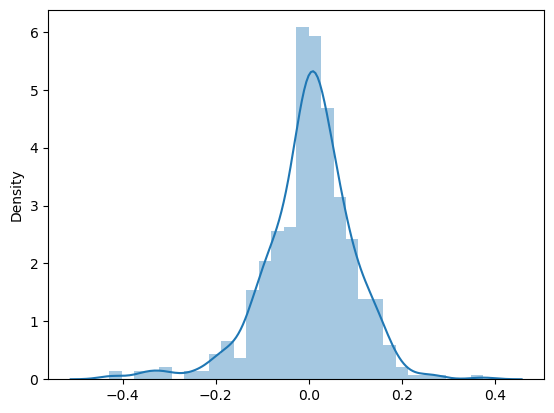

In [95]:
# residuals
cnt_mod1_pred = cnt_model_1.predict(cnt_x_1)
sns.distplot(cnt_y - cnt_mod1_pred, bins = 30)

#### <font color='orange'>Observations from VIF and error analysis</font>
- The VIF values for all the variables are under 5, and hence acceptable
- The errors are also normally distributed around zero

#### <font color='blue'>_The second model for cnt_</font>

In [97]:
cnt_model_2 = sm.OLS(cnt_y, cnt_x_2).fit()

In [98]:
print(cnt_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     100.4
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          3.91e-165
Time:                        17:45:37   Log-Likelihood:                 474.84
No. Observations:                 510   AIC:                            -903.7
Df Residuals:                     487   BIC:                            -806.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0362      0.021      1.721      

#### <font color='orange'>Observations from the second model</font>
- All p-values except 'Mar' are below 0.05. 
- F-statistic value is suffficiently high to make the fitting significant
- R-squared value is also in acceptable range

#### <font color = 'orange'> VIF and Error analysis </font>

In [100]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_cnt_mod2 = pd.DataFrame()
vif_cnt_mod2['Features'] = cnt_x_2.columns
vif_cnt_mod2['VIF'] = [variance_inflation_factor(cnt_x_2.values, i) for i in range(cnt_x_2.shape[1])]
vif_cnt_mod2['VIF'] = round(vif_cnt_mod2['VIF'], 2)
vif_cnt_mod2 = vif_cnt_mod2.sort_values(by = "VIF", ascending = False)
vif_cnt_mod2

,Features,VIF
0,const,23.66
1,atemp,5.36
18,Aug,4.91
17,Jul,4.86
16,Jun,4.01
19,Sep,3.59
15,May,3.43
20,Oct,2.75
14,Apr,2.41
13,Mar,2.31


<Axes: ylabel='Density'>

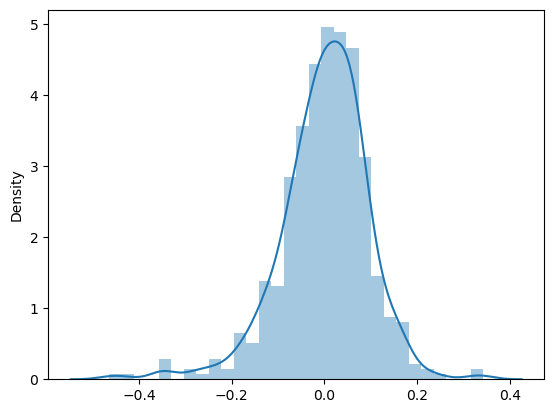

In [101]:
# residuals
cnt_mod2_pred = cnt_model_2.predict(cnt_x_2)
sns.distplot(cnt_y - cnt_mod2_pred, bins = 30)

#### <font color='orange'>Observations from VIF and error analysis</font>
- The VIF values for all the variables except 'atemp' are under 5
- The errors are also normally distributed around zero

#### <font color='blue'>Comparison between cnt model 1 and cnt model 2</font>
- The coefficients of some of the months ('Feb') in registered model 2 is not significant
- It does not make sense to drop some months, originally they are part of the single original variable
- The VIF value for 'atemp' in second model is also higer than 5
- The second approach also has higher number of variables when compared to first approach
#### <font color='red'>_Therefore, first model with seasons is selected for cnt_</font>

## _Comparison between two approaches_

#### Importing necessary libraries

In [268]:
import math

#### <font color='blue'>_Calculating the mean square error for both approaches_</font>

In [102]:
# Calculating mean squared error with first approach

cas_mod1_pred = cas_model_1.predict(cas_x_1)
reg_mod1_pred = reg_model_1.predict(reg_x_1)
cnt_mod1_pred = cnt_model_1.predict(cnt_x_1)

7.027709883057247


In [ ]:
# approach 1 mean square error
sq1 = math.sqrt(sum((cnt_y-(cas_mod1_pred+reg_mod1_pred))**2))
print(sq1)

In [ ]:
# approach 2 mean square error
sq2 = math.sqrt(sum((cnt_y - cnt_mod1_pred)**2))
print(sq2)

### <font color='red'>The mean square error for the second approach is 1/3rd of that of first approach. Therefore, the first model with second approach with just 'cnt' is selected. That model has adjusted R-squared value greater than 0.8 with all coefficients as well as model being significant.</font>


## _Comparing Predictions with final model_

In [104]:
### Test Data

#### <font color='blue'>_Scaling and refining the test data_</font>

In [108]:
# Extracting the correct columns from test data
test_df = cnt_test[cnt_x_1.columns[cnt_x_1.columns != 'const']]
test_df = pd.concat([test_df, cnt_test['cnt']],axis=1)
test_df.head()

,atemp,Mon,Tue,Wed,Thu,Fri,Sat,holiday_yes,misty,light-rain,2019,summer,fall,winter,cnt
184,33.27085,1,0,0,0,0,0,1,1,0,0,0,1,0,6043
535,36.04875,0,0,1,0,0,0,0,0,0,1,1,0,0,6211
299,22.85230,0,0,0,1,0,0,0,1,0,0,0,0,1,2659
221,34.24915,0,0,1,0,0,0,0,0,0,0,0,1,0,4780
152,32.19710,0,0,0,1,0,0,0,0,0,0,1,0,0,4968


In [109]:
# Scaling the test data
test_df[['atemp','cnt']] = scaler_cnt.transform(test_df[['atemp','cnt']])
test_df.head()

,atemp,Mon,Tue,Wed,Thu,Fri,Sat,holiday_yes,misty,light-rain,2019,summer,fall,winter,cnt
184,0.769660,1,0,0,0,0,0,1,1,0,0,0,1,0,0.692706
535,0.842587,0,0,1,0,0,0,0,0,0,1,1,0,0,0.712034
299,0.496145,0,0,0,1,0,0,0,1,0,0,0,0,1,0.303382
221,0.795343,0,0,1,0,0,0,0,0,0,0,0,1,0,0.547400
152,0.741471,0,0,0,1,0,0,0,0,0,0,1,0,0,0.569029


In [110]:
# converting the test data into input and output variables
y_test = test_df.pop('cnt')
X_test = test_df

In [111]:
# Adding the constant
X_test = sm.add_constant(X_test)
X_test.head()

,const,atemp,Mon,Tue,Wed,Thu,Fri,Sat,holiday_yes,misty,light-rain,2019,summer,fall,winter
184,1.0,0.769660,1,0,0,0,0,0,1,1,0,0,0,1,0
535,1.0,0.842587,0,0,1,0,0,0,0,0,0,1,1,0,0
299,1.0,0.496145,0,0,0,1,0,0,0,1,0,0,0,0,1
221,1.0,0.795343,0,0,1,0,0,0,0,0,0,0,0,1,0
152,1.0,0.741471,0,0,0,1,0,0,0,0,0,0,1,0,0


#### <font color='blue'>_Comparing the predictions with observations_</font>

In [200]:
test_fit = cnt_model_1.predict(X_test)

<Axes: ylabel='Density'>

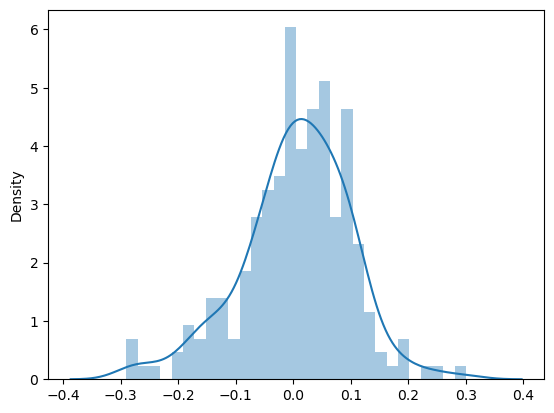

In [202]:
# Finding the error distribution
sns.distplot(y_test - test_fit, bins = 30)

In [204]:
# calculating the mean squared error
math.sqrt(sum((y_test - test_fit)**2))

1.4029545700968944

### <font color='red'> _The mean squared error for the test data is less than 2. The errors are distributed noramlly with zero as mean._</font>


#### <font color='blue'>_Model Evaluation_</font>

Text(0, 0.5, 'y_pred')

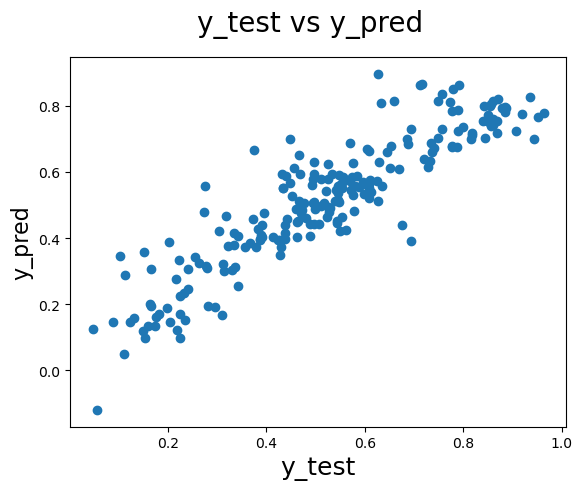

In [206]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, test_fit)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

## _Model Equation_

####  <font color='red'> count = 0.0380 + 0.485 x atemp + 0.0351 x Mon + 0.0396 x Tue + 0.0586 x Wed + 0.0541 x Thu + 0.0654 x Fri + 0.0582 x Mon - 0.0834 x holiday_yes - 0.0779 x misty - 0.2951 x light-rain + 0.2350 x Mon + 0.1235 x summer + 0.1078 x fall + 0.1705 x winter </font>

- I acknowledge that the R-squared of the model can be imporoved by adding the neglected variables, however their low correlation with cnt shows that R-squared increase would be marginal
- Another approach can be taken where some months can be removed according to VIF and p-values in second approach. 